In [12]:

# Load libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

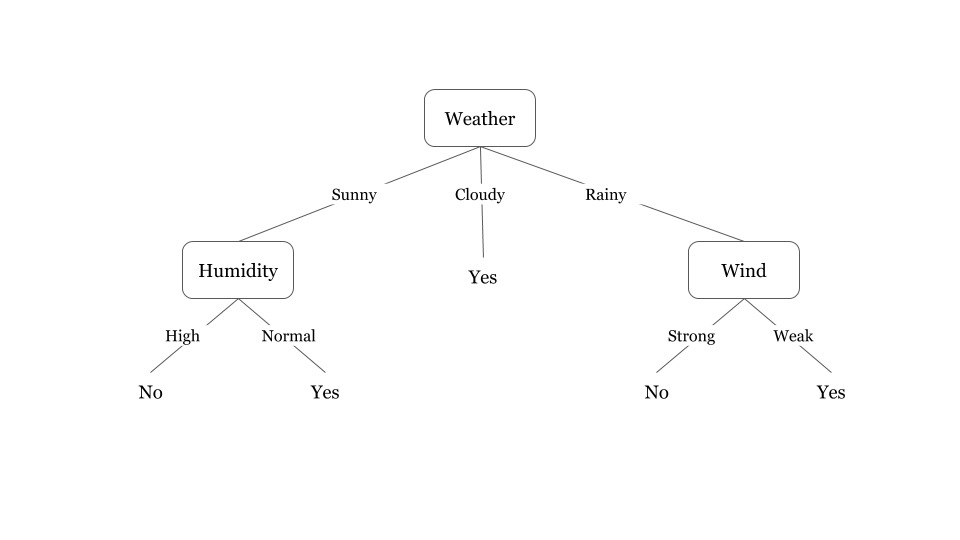

In [13]:
# Open a file
dataset = pd.read_csv('normalizedData/normalizedLearn.csv')
dataset.groupby('label').size()

label
attack     9999
normal    28944
dtype: int64

In [14]:
# split dataset
array = dataset.values
# Notice that we exclude the source and destination IPs 
X = array[:,2:12]
Y = array[:,12]

In [15]:
# This indicates what pervcent of total data is the attack data
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size)
X_train_set, X_test, Y_train_set, Y_test = model_selection.train_test_split(X_train, Y_train, test_size=validation_size)

# Test options and evaluation metric
scoring = 'accuracy'

# valuating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

LR Accuracy: 0.981785 (+/- 0.000756)
LDA Accuracy: 0.994762 (+/- 0.001293)
KNN Accuracy: 0.998870 (+/- 0.000589)
CART Accuracy: 0.999692 (+/- 0.000274)
RFC Accuracy: 0.999829 (+/- 0.000188)


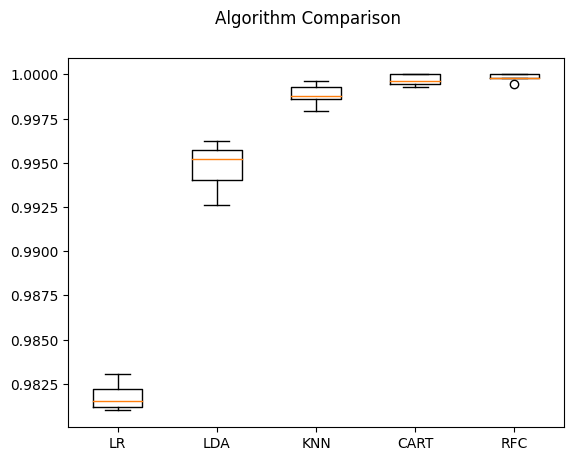

In [16]:

# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Validating Feature importance
[0.23779107 0.15501469 0.30152523 0.00858547 0.10975631 0.00520501
 0.0631804  0.0788392  0.01774081 0.02236181]


<Axes: >

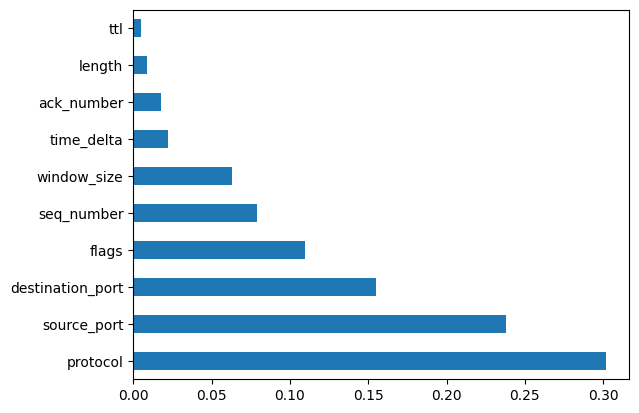

In [17]:

# Feature Importance
print ("Validating Feature importance")
# fit an Extra Trees model to the data
test_model = RandomForestClassifier()
test_model.fit(X_train, Y_train)

# display the relative importance of each attribute
print(test_model.feature_importances_)

# plot
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[2:12])
feat_importances.nlargest(20).plot(kind='barh')

Now, in order to be able to test the models

In [18]:
from helper import processFile, ip_to_numeric

# Making sure the file is clean
file_to_delete = open("normalizedData/test.csv",'w')
file_to_delete.write("source,destination,source_port,destination_port,protocol,length,flags,ttl,window_size,seq_number,ack_number,time_delta,label\n")
file_to_delete.close()

In [19]:

file = processFile("newCaptures/icmp-ping.pcap","normal", path="normalizedData/test.csv", type='a')

file = pd.read_csv('normalizedData/test.csv')

file = file.drop("label", axis=1)
file.head(3)


,source,destination,source_port,destination_port,protocol,length,flags,ttl,window_size,seq_number,ack_number,time_delta
0,10.0.0.2,10.128.0.2,0,0,1,28,0,64,0,0,0,0.000000
1,10.0.0.2,10.128.0.2,0,0,1,28,0,64,0,0,0,0.000628
2,10.0.0.2,10.128.0.2,0,0,1,28,0,64,0,0,0,0.000060


In [20]:

file['source'] = file['source'].apply(ip_to_numeric)
file['destination'] = file['destination'].apply(ip_to_numeric)

file.to_csv('normalizedData/test.csv', index = False)

file.head(5)

,source,destination,source_port,destination_port,protocol,length,flags,ttl,window_size,seq_number,ack_number,time_delta
0,167772162,176160770,0,0,1,28,0,64,0,0,0,0.000000
1,167772162,176160770,0,0,1,28,0,64,0,0,0,0.000628
2,167772162,176160770,0,0,1,28,0,64,0,0,0,0.000060
3,167772162,176160770,0,0,1,28,0,64,0,0,0,0.000403
4,167772162,176160770,0,0,1,28,0,64,0,0,0,0.000459


In [21]:
# split dataset
array = file.values
# Notice that we exclude the source and destination IPs 
X = array[:,2:12]
results = test_model.predict(X)
results

array(['attack', 'attack', 'attack', ..., 'attack', 'attack', 'attack'],
      dtype=object)

In [22]:
matches = np.count_nonzero(results == 'attack')
total = results.size
print(matches,'/',total)

12035 / 12035
